# VAISHNAVI ANNAGIRI
DATA SCIENCE AND BUSINESS ANALYTICS INTERN

# GRIP AT SPARKS FOUNDATION

# TASK 1:

# Simple Linear Regression

The task deals with predicting the the percentage of students based on the number of study hours.We will be using simple linear regression to build our model and to make predictions.This is a simple linear regression task as it involves just 2 variables.

# Importing the libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import requests
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [3]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)
print(df)
df.head()

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.shape

(25, 2)

In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Plotting the dataset

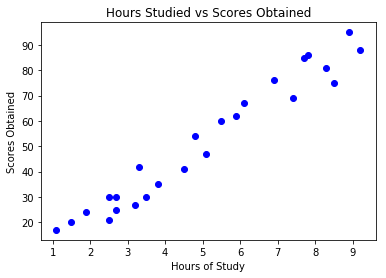

In [8]:
#Scatter Plot
plt.scatter(df.Hours, df.Scores,  color='blue')
plt.xlabel("Hours of Study")
plt.ylabel("Scores Obtained")
plt.title("Hours Studied vs Scores Obtained")
plt.show()

Text(0, 0.5, 'Scores')

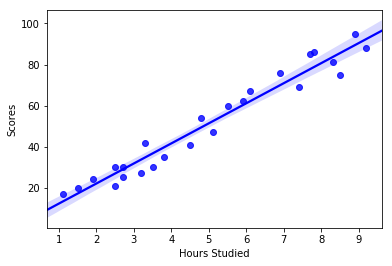

In [9]:
sns.regplot(x='Hours',y='Scores',data=df,color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
        

# Exploratory Data Analysis


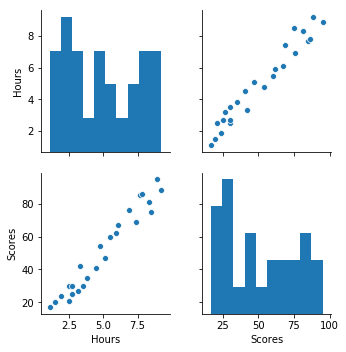

In [10]:
 sns.pairplot(df)

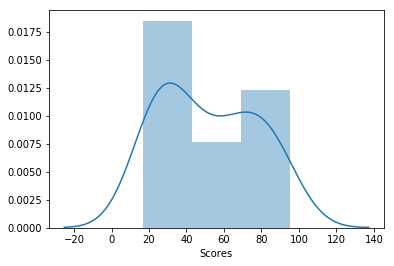

In [11]:
sns.distplot(df['Scores'])

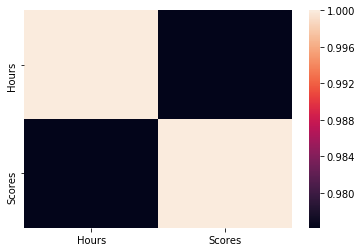

In [12]:
sns.heatmap(df.corr())

# Data Preparation

In [13]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [14]:
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Training the Model

In [15]:
#Splitting the dataset ,where 80% of data is used for training and the rest for testing purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 
print("The model has been created")

The model has been created


In [16]:
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [9.91065648]


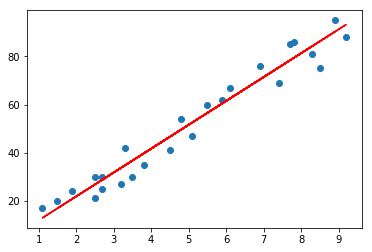

In [17]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.show()

# Making predictions using the created  model

In [18]:
#we will be using the testing data to make the predictions

In [19]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [20]:
#predicting the y values based on testing x values
y_pred = regressor.predict(X_test)
print('Predicted Values',y_pred)

Predicted Values [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


# Comparing the Actual values to the Predicted Values

In [21]:
df1 = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred}) 
df1

,Actual Values,Predicted Values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105356


# Visualizing the Results

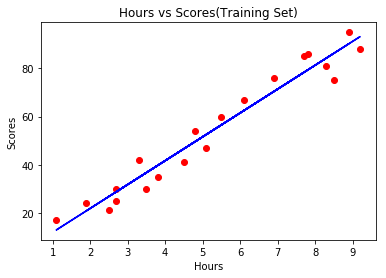

In [23]:
#Visualzing the training set results
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Hours vs Scores(Training Set)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

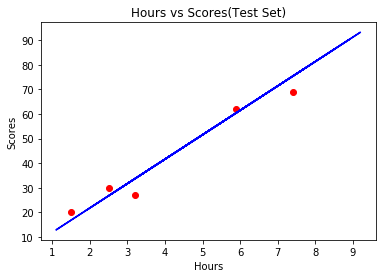

In [24]:
#Visualizing the test set results
plt.scatter(X_test, y_test, color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Hours vs Scores(Test Set)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

# We shall now want to predict the scores obtained if the study hours is 9.25

In [27]:
hoursofstudy = 9.25
test = np.array([hoursofstudy])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hoursofstudy))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [28]:
#The line equation
coefficient =regressor.coef_
intercept = regressor.intercept_

# Since, y = m*x + c
line = (df['Hours'].values * coefficient) + intercept


# Applying the Evaluation Metrics to our model

In [40]:
from sklearn import metrics 

In [41]:
#Calculating the Mean Absolute Error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


In [42]:
#Calculating the Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 21.5987693072174


In [44]:
#Calculating the Root Mean Squared Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 4.6474476121003665


In [45]:

print('R-2:', metrics.r2_score(y_test, y_pred))

R-2: 0.9454906892105356


I have successfully implemented the concept of linear regression by carrying out the prediction of the scores based on study hours .I have thoroughly understood and implemented the rudimentary concepts of Data Analysis and Data Visualisation.
Thank You!